<a href="https://colab.research.google.com/github/rkVirtudez/CPE-018-CPE31S2/blob/main/Activity_5_Line_and_Circle_Detection_VIRTUDEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 018
Code Title: | Emerging Technologies in CpE 1 - Fundamentals of Computer Vision
2nd Semester | AY 2025-2026
<u>
**ACTIVITY NO.** | **TITLE**
**Name** | Virtudez, Renmar Keir F.
**Section** | CPE31S2
**Date Performed**: | 1/20/26
**Date Submitted**: | 1/20/26
**Instructor**: | Dr. Jonathan V. Taylar / Engr. Verlyn V. Nojor / Engr. Roman M. Richard
</u> </hr>

## 1. Objectives

This activity aims to introduce students to openCV's APIs for Hough Transform.

## 2. Intended Learning Outcomes (ILOs)
After this activity, the students should be able to:
* Utilize openCV for circle and line detection.
* Analyze the use of hough Line and Circle function for finding objects in an image.

## 3. Procedures and Outputs

Detecting edges and contours are not only common and important tasks, they also constitute the basis for other complex operations. Lines and shape detection go hand in hand with edge and contour detection, so let's examine how OpenCV implements these.

### Line Detection

The theory behind lines and shape detection has its foundation in a technique called the Hough transform, invented by Richard Duda and Peter Hart, who extended (generalized) the work done by Paul Hough in the early 1960s.

Let's take a look at OpenCV's API for the Hough transforms.

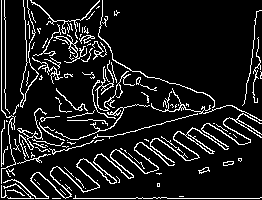

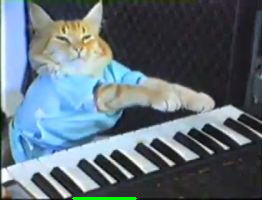

In [3]:
# Image source: https://en.wikipedia.org/wiki/Keyboard_Cat

from google.colab.patches import cv2_imshow
import cv2
import numpy as np

img = cv2.imread('/content/drive/MyDrive/EMTECH/Keyboard_cat.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,120)
minLineLength = 20
maxLineGap = 5
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,
        maxLineGap)
for x1,y1,x2,y2 in lines[0]:
  cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(edges)
cv2_imshow(img)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The crucial point of this simple script —aside from the HoughLines function call— is the setting of minimum line length (shorter lines will be discarded) and the maximum line gap, which is the maximum size of a gap in a line before the two segments start being considered as separate lines.

Also note that the HoughLines function takes a single channel binary image, processed through the Canny edge detection filter. Canny is not a strict requirement, however; an image that's been denoised and only represents edges, is the ideal source for a Hough transform, so you will find this to be a common practice.

The parameters of HoughLinesP are as follows:
- The image we want to process.
- The geometrical representations of the lines, rho and theta, which are usually 1 and np.pi/180.
- The threshold, which represents the threshold below which a line is discarded. The Hough transform works with a system of bins and votes, with each bin representing a line, so any line with a minimum of the <threshold> votes is retained, the rest discarded.
- MinLineLength and MaxLineGap, which we mentioned previously

**Questions:**

1. Which line of code is responsible for setting the minimum line length?
    -
2. What is the mathematical formula for Hough transform and explain how it finds lines.
    -

### Circle Detection

OpenCV also has a function for detecting circles, called HoughCircles. It works in a very similar fashion to HoughLines, but where minLineLength and maxLineGap were the parameters to discard or retain lines, HoughCircles has a minimum distance between circles' centers, minimum, and maximum radius of the circles. Here's the obligatory example:

Before going into the sample code, check first: **What is the HoughCircles function and what are its parameters?**

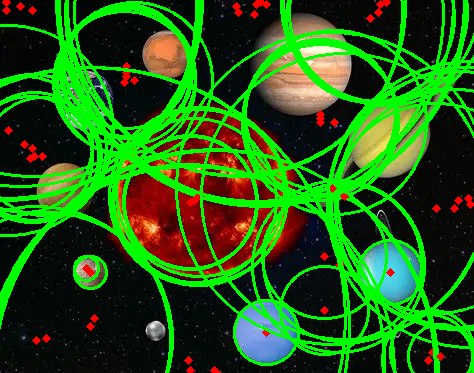

In [95]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Our testing value
n = 5

planets = cv2.imread('/content/drive/MyDrive/EMTECH/planets.webp')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=50,param2=20,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("/content/drive/MyDrive/EMTECH/planets.webp", planets)
cv2_imshow(planets)

What happens to the code once you run **and the value of n is 5**?

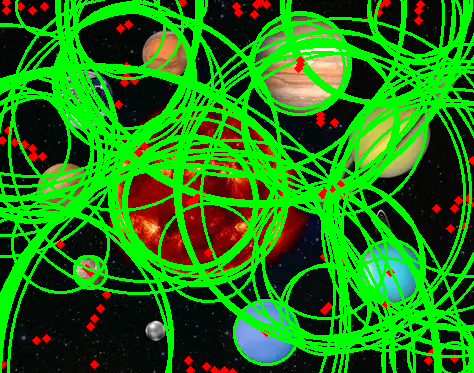

In [98]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Our testing value
n = 9

planets = cv2.imread('/content/drive/MyDrive/EMTECH/planets.webp')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("/content/drive/MyDrive/EMTECH/planets.webp", planets)
cv2_imshow(planets)

Change the value to 9, **what happens to the image**?

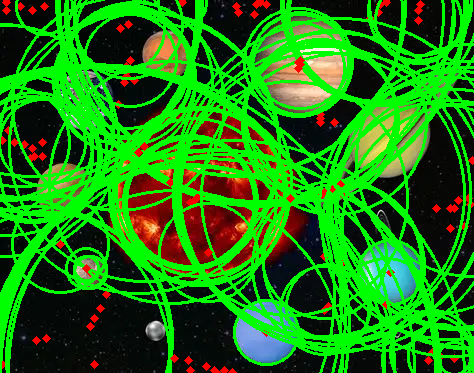

In [99]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Our testing value
n = 15

planets = cv2.imread('/content/drive/MyDrive/EMTECH/planets.webp')
gray_img = cv2.cvtColor(planets, cv2.COLOR_BGR2GRAY)
img = cv2.medianBlur(gray_img, n) # We will change this value passed as parameter and observe results
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,120,
                            param1=100,param2=30,minRadius=0,
                                maxRadius=0)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
  # draw the outer circle
  cv2.circle(planets,(i[0],i[1]),i[2],(0,255,0),2)
  # draw the center of the circle
  cv2.circle(planets,(i[0],i[1]),2,(0,0,255),3)

cv2.imwrite("/content/drive/MyDrive/EMTECH/planets.webp", planets)
cv2_imshow(planets)

Lastly, change the value to 15, **what can you say about the resulting image?**

Provide an analysis of the output so far. How does the code help the changes in the resulting image?

- It generate more circles, because of the N value that I changed.

## 4. Supplementary Activity

The attached image contains coins used in the Philippines.

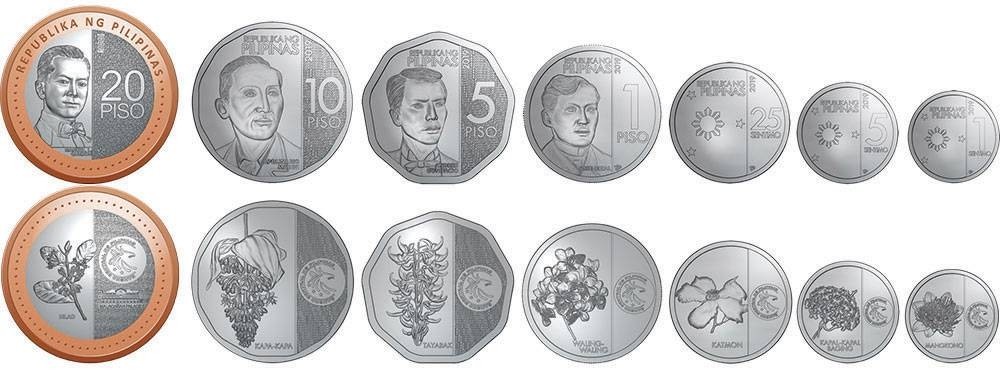

Your job is to count the amount of coins (denomation not included, no sum of prices; just the amount of coins present) through either line detection or circle detection.

- Create a function using line detection and pass this image as parameter, what is the output? Can you use houghlines to count circles?
    - ***The results show random, broken lines that only appear on the sharp edges and small details inside the coins. Instead of detecting the actual round shape of the coins, the algorithm just picks up the textures and shadows***
- Create a function using circle detection and pass this image as parameter, show the output? Can you use houghcircles to count the circles?
    - ***The final output successfully identifies all 14 coins, highlighting each with a green border and a red center. Implementing a median blur of 15 was essential to filter out internal coin details, ensuring the algorithm only detected the circular shapes.***

Total coins detected via Circle Detection: 14


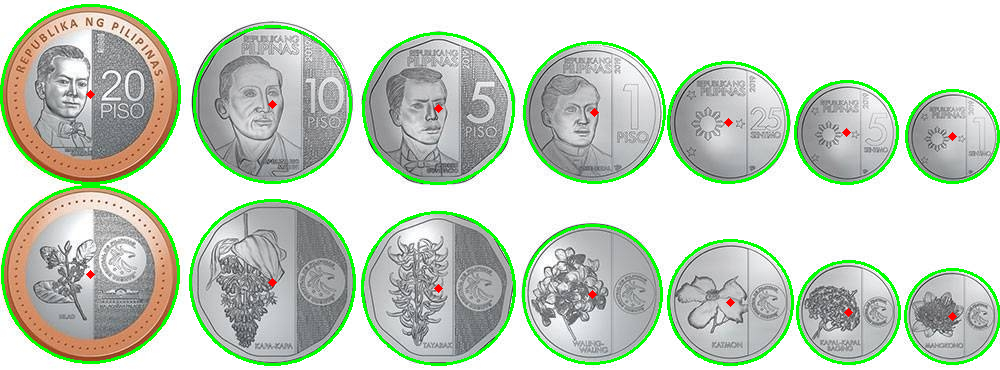

In [91]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def count_coins_circles(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    blurred = cv2.medianBlur(gray, 15)

    circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, 1, minDist=50,
                               param1=100, param2=30, minRadius=20, maxRadius=150)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        count = len(circles[0])

        for i in circles[0, :]:
            cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
            cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)

        print(f"Total coins detected via Circle Detection: {count}")
        cv2_imshow(img)
    else:
        print("No coins detected.")

count_coins_circles('/content/drive/MyDrive/EMTECH/coins.jpg')

## 5. Summary, Conclusions and Lessons Learned

**Summary**

This activity explored the use of OpenCVs Hough Transform APIs to find objects in images. We used HoughLinesP to detect straight edges and HoughCircles to locate and count coins. The experiment showed that while both tools find shapes, they require very different settings to be accurate.

**Conclusions**

Line detection is not suitable for counting circles. It detects too many small line segments from the coins texture and text instead of the actual coin shape.
Circle detection is the correct method for this task. When tuned correctly, HoughCircles accurately identified all 14 coins in the image by focusing on the round outlines.

**Lessons Learned**

Pre-processing is key: Using medianBlur or GaussianBlur is necessary to remove "noise" like the faces on the coins. Without blurring, the computer detects too many false circles.

Parameter Tuning: Finding the right values for minDist and param2 is a trial-and-error process. Small coins are easily missed if the sensitivity or radius settings are too strict.

<hr/>

***Proprietary Clause***

*Property of the Technological Institute of the Philippines (T.I.P.). No part of the materials made and uploaded in this learning management system by T.I.P. may be copied, photographed, printed, reproduced, shared, transmitted, translated, or reduced to any electronic medium or machine-readable form, in whole or in part, without the prior consent of T.I.P.*